## Loading of Stringer spontaneous data

includes some visualizations

In [ ]:
#@title Data retrieval - spontaneous
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [22]:
#@title Data retrieval - evoked
import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [23]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [24]:
#@title Data loading
import numpy as np
# spont_dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
# print(spont_dat.keys())

#@title Data loading
evoked_dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(evoked_dat.keys())


dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])



dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (14752 by 8118). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details. 
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other. 
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

# **Process spontaneous data**

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = spont_dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

print("Layer depths: ", np.unique(z))

NameError: ignored

In [ ]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 
abs_z = abs(z)
l2_spont = np.where(abs_z < 300)[0]
l4_spont = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]

spont_labels = np.zeros(z.shape[0])
spont_labels[l2_spont] = 2
spont_labels[l4_spont] = 4

In [ ]:
l2_spont_sample = np.random.choice(l2_spont, len(l5_evoked))
l4_spont_sample = np.random.choice(l4_spont, len(l5_evoked))

spont_labels_sample = np.zeros(z.shape[0])
spont_labels_sample[l2_spont_sample] = 2
spont_labels_sample[l4_spont_sample] = 4

NameError: ignored

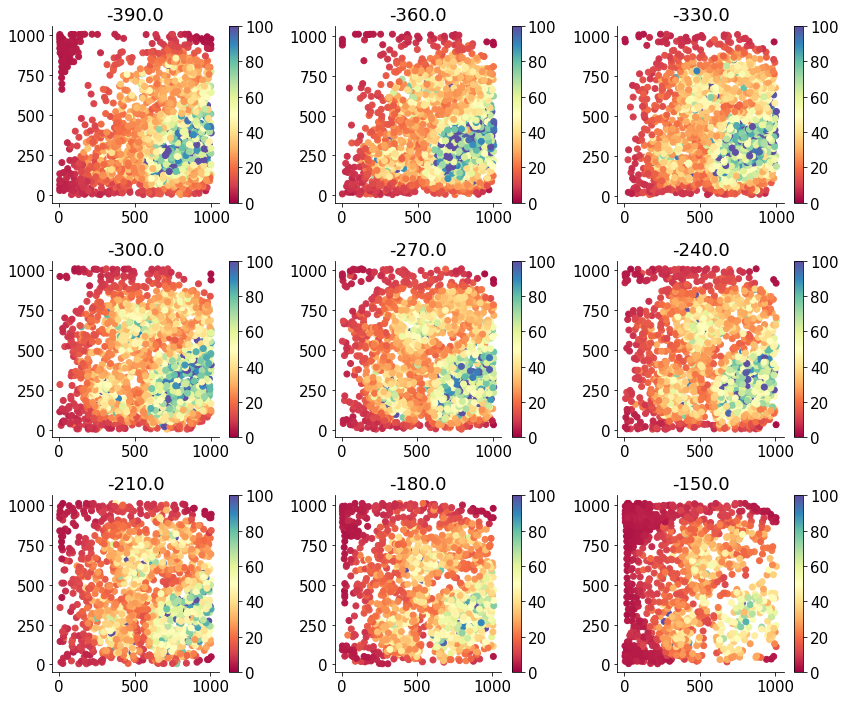

In [ ]:
plt.figure(figsize=(12,10))

for i, zi in enumerate(np.unique(z)):
  pl_1 = spont_dat['sresp'][np.where(z==zi)]
  x_pl1, y_pl1, z_pl1 = spont_dat['xyz'][:,np.where(z==zi)]

  avg_neuro = np.mean(pl_1, axis=1)

  plt.subplot(3,3,i+1)
  plt.scatter(x_pl1[::-1],y_pl1[::-1],c=avg_neuro, cmap='Spectral', vmin = 0, vmax=100)
  plt.title(zi)
  plt.colorbar()



# **Process evoked data**

Layer depths: [-450. -425. -400. -375. -350. -325. -300. -275. -250. -225. -200. -175.
 -150.]


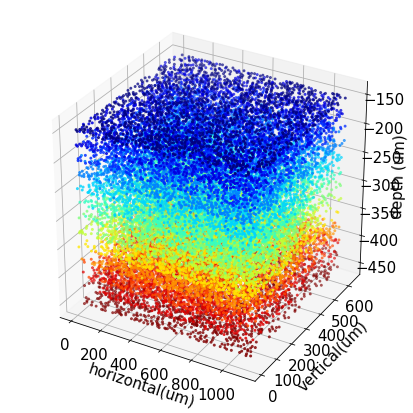

In [25]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = evoked_dat['xyz']
zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

print('Layer depths:', np.unique(z))

In [26]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 
abs_z = abs(z)
l2_evoked = np.where(abs_z < 300)[0]
l4_evoked = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]
l5_evoked = np.where(abs_z >= 400)[0]

evoked_labels = np.zeros(z.shape[0])
evoked_labels[l2_evoked] = 2
evoked_labels[l4_evoked] = 4
evoked_labels[l5_evoked] = 5

In [27]:
l2_evoked_sample = np.random.choice(l2_evoked, len(l5_evoked))
l4_evoked_sample = np.random.choice(l4_evoked, len(l5_evoked))

evoked_labels_sample = np.zeros(z.shape[0])
evoked_labels_sample[l2_evoked_sample] = 2
evoked_labels_sample[l4_evoked_sample] = 4
evoked_labels_sample[l5_evoked] = 5

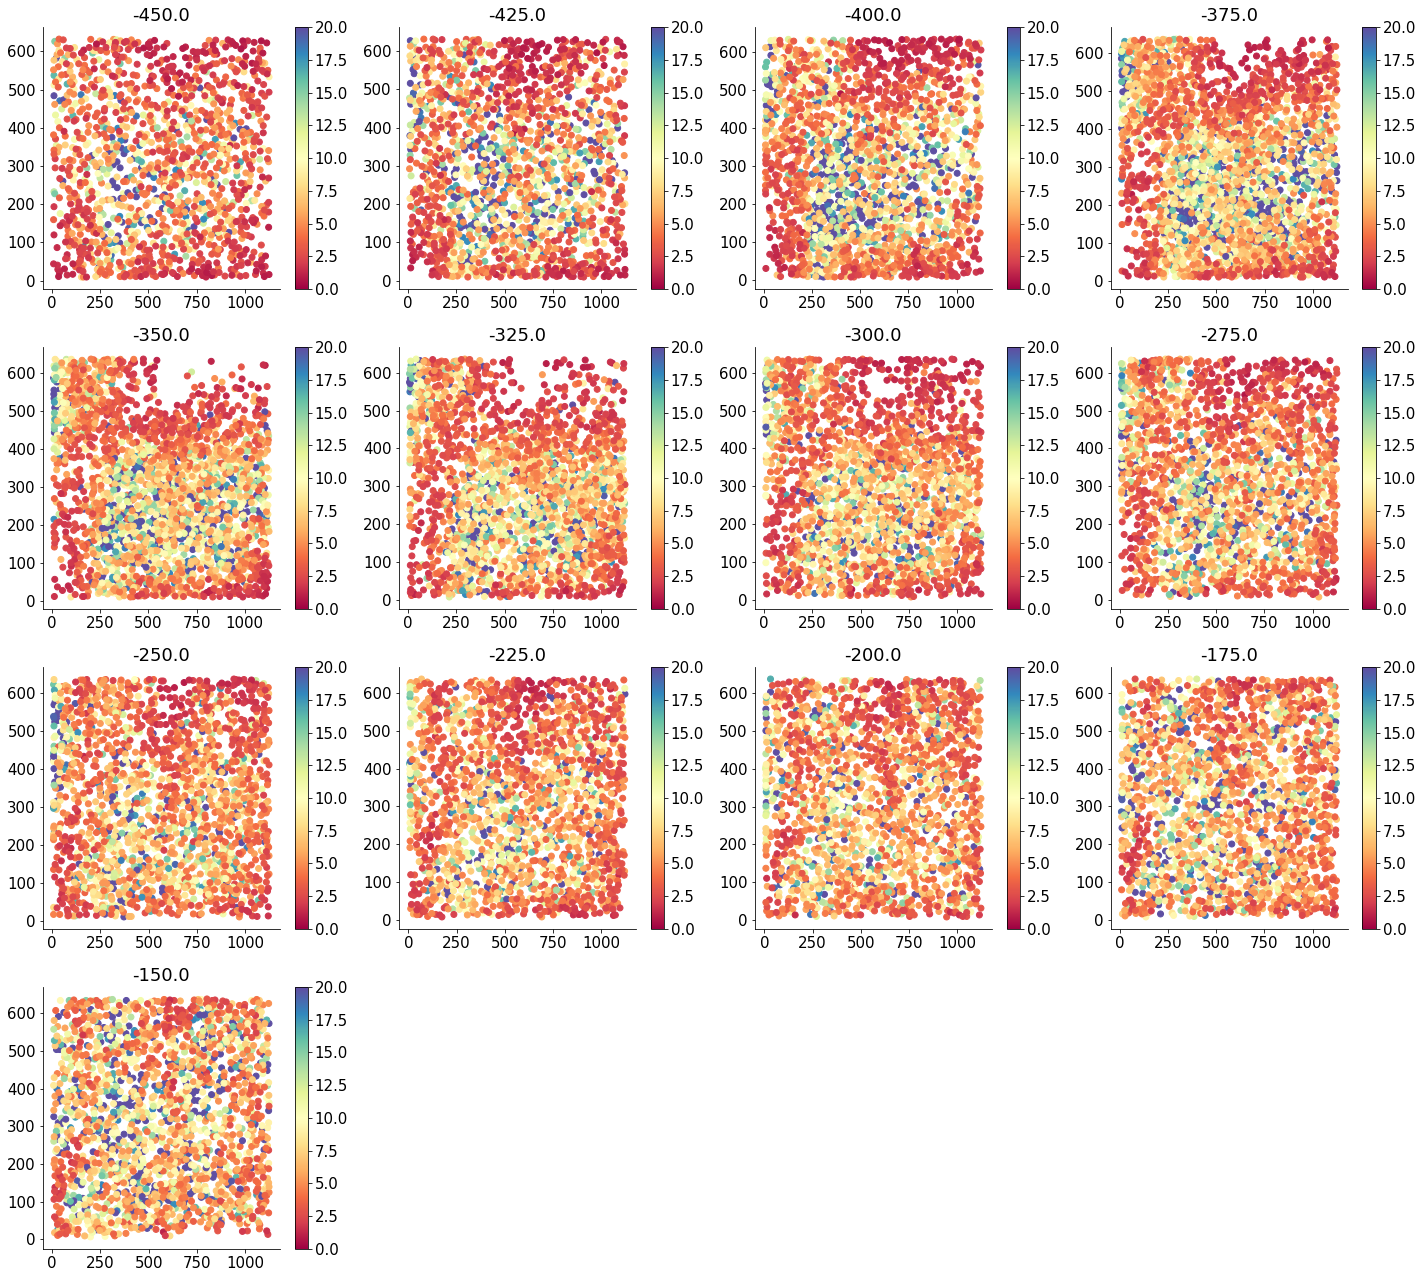

In [34]:
plt.close
plt.figure(figsize=(20,18))

for i, zi in enumerate(np.unique(z)):
  pl_1 = evoked_dat['sresp'][np.where(z==zi)]
  x_pl1, y_pl1, z_pl1 = evoked_dat['xyz'][:,np.where(z==zi)]

  avg_neuro = np.mean(pl_1, axis=1)

  plt.subplot(4,4,i+1)
  plt.scatter(x_pl1[::-1],y_pl1[::-1],c=avg_neuro, cmap='Spectral', vmin = 0, vmax=20)
  plt.title(zi)
  plt.colorbar()



In [ ]:

pl_1 = evoked_dat['sresp'][np.where(z==-150)]
x_pl1, y_pl1, z_pl1 = evoked_dat['xyz'][:,np.where(z==-150)]

pl_2 = evoked_dat['sresp'][np.where(z==-175)]
x_pl2, y_pl2, z_pl2 = evoked_dat['xyz'][:,np.where(z==-175)]


-150.0
-150.0


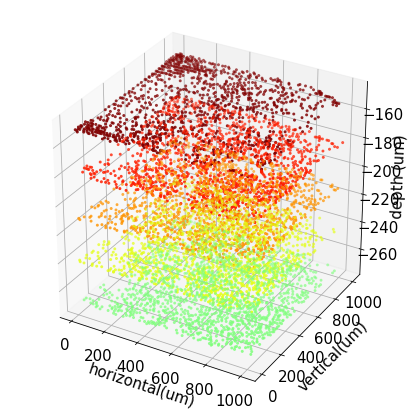

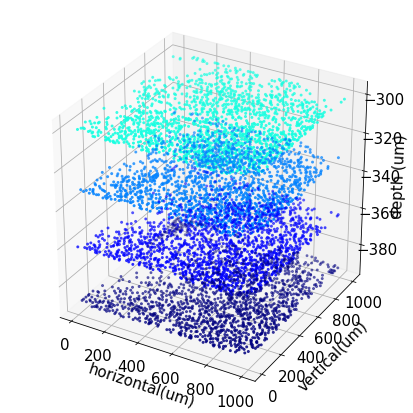

In [ ]:
# @title plot the 3D positions of all neurons
label_vec = [2,4]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for i in label_vec:
  x, y, z = spont_dat['xyz']
  print(np.max(z))
  zunq, iunq = np.unique(z, return_inverse=True)
  xc = np.linspace(0.0, 1.0, len(zunq))
  cmap = cm.get_cmap('jet')(xc)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111, projection='3d')
  current_layer = np.where(spont_labels == i)[0]
  ax.scatter(x[current_layer],y[current_layer],z[current_layer], 'o', s = 4, c = cmap[iunq][current_layer])
  ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

In [ ]:
l2_spont_sample = np.random.choice(l2_spont, len(l4_spont))
spont_labels_sample = np.zeros(z.shape[0])
spont_labels_sample[l2_spont_sample] = 2
spont_labels_sample[l4_spont] = 4

**Hierchical clustering**

In [ ]:
# import seaborn
# import sys
# sys.setrecursionlimit(10000)

# # x, y, z = evoked_dat['xyz']
# x, y, z = spont_dat['xyz']
# # data = evoked_dat['sresp'][np.where(z==-275)]
# data = spont_dat['sresp'][np.where(z==-300)]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


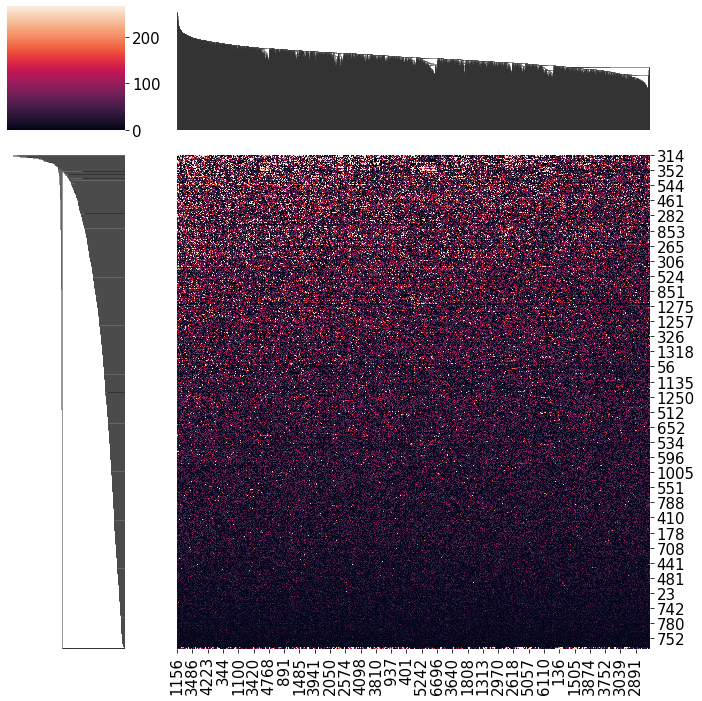

In [ ]:

#seaborn.clustermap(data, method='average', metric='euclidean',robust = True)#, 
                  #  z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, 
                  #  row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                  #  row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, 
                  #  colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None)

Seeding based correlation

Layer depths:  [-450. -425. -400. -375. -350. -325. -300. -275. -250. -225. -200. -175.
 -150.]


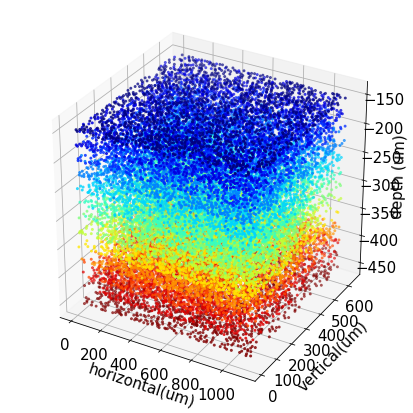

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = evoked_dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

print("Layer depths: ", np.unique(z))

In [ ]:
def cells_by_orientation(traces, stim):  
  orientations = np.linspace(0, (2*np.pi), 21)[0:-1]
  seeds = []

  for ori in orientations:
      absolute_val_array = np.abs(stim - ori)
      smallest_difference_index = absolute_val_array.argmin()
      cell_index = np.where(traces == max(traces[:,smallest_difference_index]))[0][0]
      seeds.append(cell_index)
      
  return(seeds)


def seed_correlation(traces, coords, seeds):
  #Build correlation matrix for all cells
  corr_mat = np.corrcoef(traces)

  #Loop through each cell 
  corr_list = list(range(len(seeds)))
  for i,current_seed in enumerate(seeds):
    corr_list[i] = corr_mat[current_seed]

  return(corr_list)

In [ ]:
depth = -450
current_traces = evoked_dat['sresp'][np.where(z == depth)[0]]
stim = evoked_dat['istim']
current_coords = np.vstack((evoked_dat['xyz'][:,np.where(z==depth)]))
avg_neuro = np.mean(current_traces, axis=1)

seeds = cells_by_orientation(current_traces, stim)
seeds
seed_corr = seed_correlation(current_traces, current_coords,seeds)

# plt.figure(figsize=(7,7))
# plt.scatter(current_coords[0],current_coords[1],c=avg_neuro, cmap='Spectral', vmin = 0, vmax=50, alpha = 0.9)
# plt.title(str(depth))
# plt.colorbar()

In [ ]:
# import seaborn as sns

# iris = sns.load_dataset("iris")
# g = sns.jointplot("sepal_width", "petal_length", data=iris,
#                   kind="kde", space=0, color="g")

In [ ]:
# import seaborn as sns

# g = sns.jointplot("x", "y", data=pdf,
#                   kind="kde", space=0, color="g")

In [ ]:
# import pandas as pd
# i=0
# df = {'x' : current_coords[0], 'y' : current_coords[1], 'correlation' : seed_corr[i]}
# df

# pdf = pd.DataFrame.from_dict(df)
# pdf

In [ ]:
current_coords[1]

array([317.87, 162.26,  35.91, ..., 506.73,  70.49, 166.25])

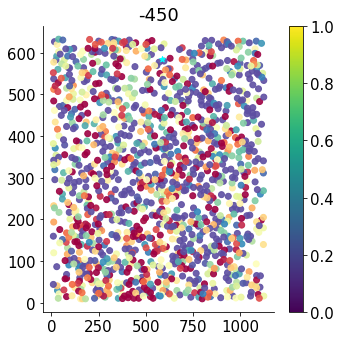

In [ ]:
i=0
plt.figure(figsize=(5,5))
plt.scatter(current_coords[0],current_coords[1],c=seed_corr[i], cmap='Spectral_r', vmin = 0, vmax=0.2, alpha = 0.9)
plt.scatter(current_coords[:,seeds[i]][0],current_coords[:,seeds[i]][0], marker = '*', c = 'cyan')
plt.title(str(depth))
plt.colorbar()
plt.show()

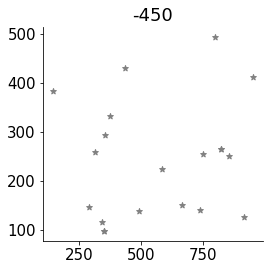

In [ ]:
plt.figure(figsize=(4,4))
for i in range(len(seeds)):
  plt.scatter(current_coords[:,seeds[i]][0],current_coords[:,seeds[i]][1], marker = '*', c = 'grey')
plt.title(str(depth))
plt.colorbar
plt.show()

In [ ]:
len(seeds)

20

In [ ]:
plt.figure(figsize=(20,20))
x,y = 0,0
for i in range(len(seeds)):
  plt.subplot(5,4,i+1)
  plt.scatter(current_coords[:,seeds[i]][0],current_coords[:,seeds[i]][1], marker = '*', c = 'black')
  plt.scatter(current_coords[0],current_coords[1],c=seed_corr[i], cmap='coolwarm', vmin = -0.2, vmax=0.2, alpha = 0.9)
  plt.title(str(seeds[i]))
  plt.colorbar()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Color code and plot orientation selectivity of cells

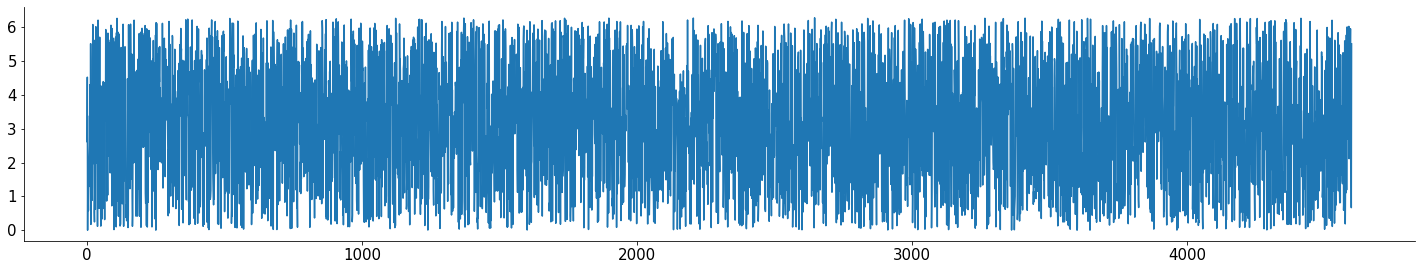

In [ ]:
plt.plot(evoked_dat['istim'])

In [ ]:
pl_2 = evoked_dat['sresp'][np.where(z==-175)]
x_pl2, y_pl2, z_pl2 = evoked_dat['xyz'][:,np.where(z==-175)]

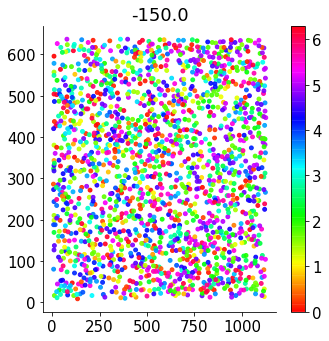

In [ ]:
ori_select = evoked_dat['istim'][np.argmax(pl_2, axis=1)]

plt.figure(figsize=(5,5))
plt.scatter(x_pl2[0],y_pl2[0],c=ori_select, cmap='hsv', vmin = 0, vmax=2*np.pi, alpha = 0.9, s=15)
plt.title(zi)
plt.colorbar()

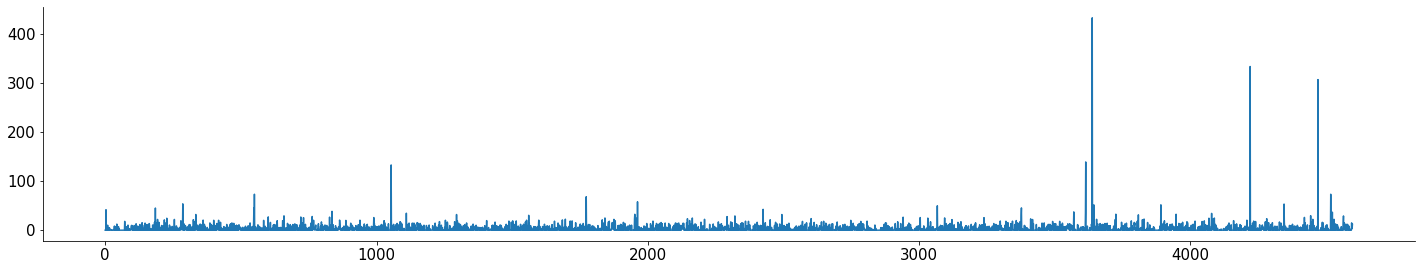

In [ ]:
plt.plot(pl_2[0])

In [ ]:
np.argmax(pl_2[0]) #index where this cell has most response (to do: find corresponding orientation)

3638

In [ ]:
evoked_dat['istim'][3638]

5.135488408974998

In [ ]:
evoked_dat['istim'][np.argmax(pl_2, axis=1)]

(1760,)

In [ ]:
np.mean(pl_2, axis=1).shape

(1760,)

In [ ]:
# If it looks like shit, it looks like shit

In [ ]:
# Make colormap that cycles to pi twice
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
top = cm.get_cmap('plasma', 128)
bottom = cm.get_cmap('plasma', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(1, 0, 128))))
intermediate_cmp = ListedColormap(newcolors, name='')
#plot_examples([intermediate_cmp])

In [ ]:
top = intermediate_cmp
bottom = intermediate_cmp

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='2pi')
#plot_examples([newcmp])

In [ ]:
plt.close
plt.figure(figsize=(20,18))

for i, zi in enumerate(np.unique(z)):
  pl = evoked_dat['sresp'][np.where(z==zi)]
  x_pl, y_pl, z_pl = evoked_dat['xyz'][:,np.where(z==zi)]

  ori_select = evoked_dat['istim'][np.argmax(pl, axis=1)]

  plt.subplot(4,4,i+1)
  plt.scatter(x_pl[::-1],y_pl[::-1],c=ori_select, cmap=newcmp, vmin = 0, vmax=2*np.pi, alpha = 0.6, s=20)
  plt.title(zi)
  plt.colorbar()

Output hidden; open in https://colab.research.google.com to view.

# Orientation selectivity



In [ ]:
stim = evoked_dat['istim']
resp = evoked_dat['sresp']

In [ ]:
orientations = np.linspace(0, (2*np.pi), 21)[0:-1] # 20 stimuli bins, 18 degrees apar
stim_binned = stim.copy()
stim_frames = np.zeros((resp.shape[0], len(orientations)))

for i in range(len(stim_binned)):
  stim_binned[i] = orientations[np.argmin(abs(stim_binned[i] - orientations))]


for i in range(len(orientations)):  
  stim_frames[:,i] = resp[:,np.where(stim_binned == orientations[i])[0]].mean(axis = 1)

In [ ]:
print('Orientations:', np.unique(stim_binned), 'Shape:', stim_frames.shape)

Orientations: [0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604] Shape: (23589, 20)


In [ ]:
pref_idx = np.argmax(stim_frames, axis = 1)
nonpref_idx = pref_idx - 5
pref_idx

array([18,  4, 10, ..., 16,  7, 10])

In [ ]:
nonpref_idx = pref_idx - 5
nonpref_idx

array([13, -1,  5, ..., 11,  2,  5])

In [ ]:
osi = np.zeros(resp.shape[0])
ori_sel = np.zeros(resp.shape[0])

for i in range(resp.shape[0]):
  mu_max = stim_frames[i, pref_idx[i]]
  mu_orth = stim_frames[i, nonpref_idx[i]]

  osi[i] = (mu_max - mu_orth) / (mu_max + mu_orth)

  if osi[i] >= 0.3:
    ori_sel[i] = orientations[pref_idx[i]]
  else: 
    ori_sel[i] = np.nan

ori_sel

array([5.65486678, 1.25663706, 3.14159265, ...,        nan, 2.19911486,
       3.14159265])

In [ ]:
np.sum(np.isnan(ori_sel))

3024

In [ ]:
plt.close
plt.figure(figsize=(15,20))

for i, zi in enumerate(np.unique(z)):
  pl = evoked_dat['sresp'][np.where(z==zi)]
  x_pl, y_pl, z_pl = evoked_dat['xyz'][:,np.where(z==zi)]

  ori_select = ori_sel[np.argmax(pl, axis=1)]

  plt.subplot(5,3,i+1)
  plt.scatter(x_pl[::-1],y_pl[::-1],c=ori_select, cmap=newcmp, vmin = 0, vmax=2*np.pi, alpha = 0.9, s=30)
  plt.title(zi)
  plt.colorbar()

Output hidden; open in https://colab.research.google.com to view.